<a href="https://colab.research.google.com/github/mmartigani/MachineLearning1/blob/main/ML17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets , neighbors
from sklearn.model_selection import train_test_split

In [3]:
iris =datasets.load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [5]:
df=pd.concat([iris.data, iris.target], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df.target.unique()

array([0, 1, 2])

In [7]:
sum(df.target==2)

50

In [8]:
df=df.loc[df.target.isin([0,1])]

In [9]:
df=df[["sepal length (cm)","sepal width (cm)","target"]]
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


In [10]:
X=df.loc[:,df.columns !="target"]
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


In [11]:
y=df.target
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [12]:
class_0=df[df["target"]==0]
class_0

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [13]:
class_1=df[df["target"]==1]
class_1

,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
55,5.7,2.8,1
56,6.3,3.3,1
57,4.9,2.4,1
58,6.6,2.9,1
59,5.2,2.7,1


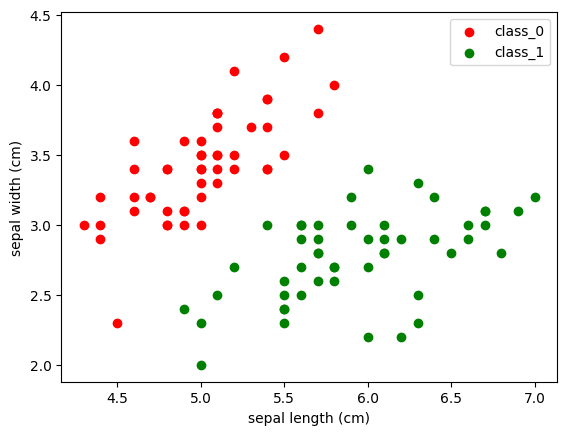

In [15]:
plt.scatter(class_0['sepal length (cm)'], class_0["sepal width (cm)"], color="r", label="class_0")
plt.scatter(class_1['sepal length (cm)'], class_1["sepal width (cm)"], color="g", label="class_1")
plt.xlabel('sepal length (cm)')
plt.ylabel("sepal width (cm)")
plt.legend()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_predict= knn.predict(X_test)

In [20]:
np.vstack([y_test, y_predict])

array([[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1]])

In [21]:
knn .score(X_test,y_test)

1.0

In [23]:
score_list=[]
for i in range(1,15):
  knn_test=neighbors.KNeighborsClassifier(n_neighbors=i)
  knn_test.fit(X_train, y_train)
  score_list.append(knn_test.score(X_test,y_test))
score_list

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

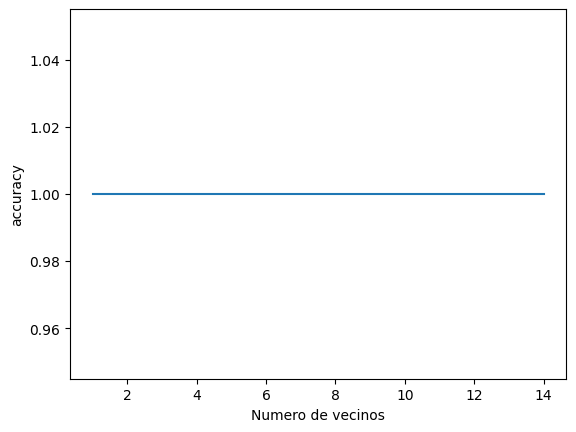

In [24]:
plt.plot(range(1,15), score_list)
plt.xlabel("Numero de vecinos")
plt.ylabel("accuracy")
plt.show()


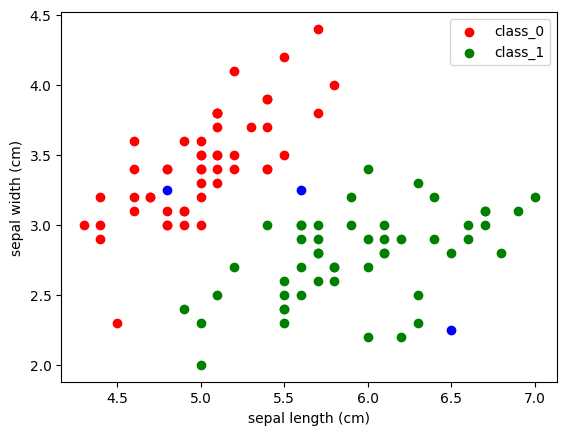

In [25]:
plt.scatter(class_0['sepal length (cm)'], class_0["sepal width (cm)"], color="r", label="class_0")
plt.scatter(class_1['sepal length (cm)'], class_1["sepal width (cm)"], color="g", label="class_1")
plt.scatter(4.8,3.25,color="b")
plt.scatter(6.5,2.25,color="b")
plt.scatter(5.6,3.25,color="b")
plt.xlabel('sepal length (cm)')
plt.ylabel("sepal width (cm)")
plt.legend()

In [30]:
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [27]:
diabetes = datasets.load_diabetes()

In [28]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [29]:
regressor = KNeighborsRegressor()

In [32]:
X_train, X_test, y_train,y_test =train_test_split(diabetes.data, diabetes.target,test_size=0.1)

In [33]:
param_grid=({"n_neighbors":range(1,51),
             "weights":["uniform","distance"]})

In [35]:
gs=GridSearchCV(estimator=regressor,param_grid=param_grid, scoring=None, cv=None)

In [36]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']})

In [37]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001837,0.002060,0.001601,0.000448,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",-0.098870,0.042423,-0.006625,0.155829,-0.038180,0.010915,0.085748,99
1,0.000633,0.000020,0.001194,0.000064,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",-0.098870,0.042423,-0.006625,0.155829,-0.038180,0.010915,0.085748,99
2,0.000619,0.000012,0.001221,0.000174,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.269775,0.182750,0.259403,0.333626,0.153827,0.239876,0.064393,98
3,0.000699,0.000149,0.001589,0.000438,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.274843,0.202632,0.261873,0.336942,0.153423,0.245943,0.062937,97
4,0.000645,0.000022,0.001246,0.000062,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.351983,0.250426,0.348566,0.470725,0.288733,0.342086,0.074748,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000765,0.000318,0.002126,0.000326,48,distance,"{'n_neighbors': 48, 'weights': 'distance'}",0.451876,0.402151,0.417843,0.535148,0.371813,0.435766,0.055995,68
96,0.000617,0.000006,0.001798,0.000010,49,uniform,"{'n_neighbors': 49, 'weights': 'uniform'}",0.439607,0.402878,0.408104,0.527962,0.356963,0.427103,0.056914,85
97,0.000615,0.000011,0.001865,0.000018,49,distance,"{'n_neighbors': 49, 'weights': 'distance'}",0.450477,0.408026,0.414596,0.535580,0.371322,0.436000,0.055767,67
98,0.000662,0.000095,0.001862,0.000065,50,uniform,"{'n_neighbors': 50, 'weights': 'uniform'}",0.440748,0.401736,0.403670,0.527132,0.357149,0.426087,0.057049,87


In [38]:
gs.best_estimator_

KNeighborsRegressor(n_neighbors=13, weights='distance')

In [39]:
gs.best_params_

{'n_neighbors': 13, 'weights': 'distance'}

In [40]:
y_pred =gs.best_estimator_.predict(X_test)

In [42]:
pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

,y_test,y_pred
0,209.0,169.475553
1,81.0,97.492065
2,220.0,248.140144
3,132.0,113.760402
4,132.0,240.700036
5,244.0,192.766463
6,242.0,254.351168
7,178.0,180.177848
8,143.0,189.953679
9,111.0,94.264075


In [45]:
best_model=gs.best_estimator_

In [46]:
best_model.score(X_test,y_test)

0.2895802720004609

In [47]:
best_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'distance'}

In [48]:
best_model.effective_metric_

'euclidean'